<a href="https://colab.research.google.com/github/Davz33/tutorials/blob/tensorflow/ML_Zero_to_Hero_1_introduction_to_tensorflow_2_convolutional_networks_zarr_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 tf example

In [1]:
from IPython.display import display as ds
import keras
from keras.api._v2.keras import layers as tfl
import tensorflow as tf
import numpy as np
!python --version
ds('tf: '+tf.__version__, 'keras: '+keras.__version__,)

Python 3.8.10


'tf: 2.11.0'

'keras: 2.11.0'

In [2]:
model = tf.keras.Sequential(
    [tfl.Dense(
        units = 1, input_shape = [1]
    )]
)

In [3]:
model.compile(
    optimizer = 'sgd',
     loss = 'mean_squared_error'
)

In [4]:
model.fit(
  np.array([-1,0,1,2,3,4.0], dtype = float),
  np.array([-3,-1,1,3,5,7.0], dtype = float),
  epochs = 500,    
)

Epoch 1/500
1/1 [==============================] - 7s 7s/step - loss: 0.5677
Epoch 2/500
1/1 [==============================] - 0s 37ms/step - loss: 0.5559
Epoch 3/500
1/1 [==============================] - 0s 24ms/step - loss: 0.5445
Epoch 4/500
1/1 [==============================] - 0s 30ms/step - loss: 0.5333
Epoch 5/500
1/1 [==============================] - 0s 21ms/step - loss: 0.5223
Epoch 6/500
1/1 [==============================] - 0s 26ms/step - loss: 0.5115
Epoch 7/500
1/1 [==============================] - 0s 16ms/step - loss: 0.5010
Epoch 8/500
1/1 [==============================] - 0s 17ms/step - loss: 0.4907
Epoch 9/500
1/1 [==============================] - 0s 14ms/step - loss: 0.4806
Epoch 10/500
1/1 [==============================] - 0s 18ms/step - loss: 0.4707
Epoch 11/500
1/1 [==============================] - 0s 17ms/step - loss: 0.4611
Epoch 12/500
1/1 [==============================] - 0s 21ms/step - loss: 0.4516
Epoch 13/500
1/1 [==============================] -

In [5]:
model.predict([10.0])

1/1 [==============================] - 0s 412ms/step


array([[18.987612]], dtype=float32)

## 2 - Fashion Mnist 

In [6]:
fmnist = tf.keras.datasets.fashion_mnist

In [7]:
( X_train, y_train ), ( X_test, y_test ) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [8]:
ds(
  f"Images sets: train - {X_train.shape}, test - {X_test.shape}",
  f"Image-labels set : train - {y_train.shape}, test - {y_test.shape}"
)

'Images sets: train - (60000, 28, 28), test - (10000, 28, 28)'

'Image-labels set : train - (60000,), test - (10000,)'

In [127]:
#@markdown ### Gathering labels

import re
labels = \
"""0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot""".split('\n')

labels = [re.match("\d\t(.+)$", s).groups()[0] for s in labels]

In [9]:
models = {
    'sample': model,
    'fashion_mnist': 
      tf.keras.Sequential([
          tfl.Flatten(input_shape=(28,28)),
          tfl.Dense(
              128,
              tf.nn.relu),
            tfl.Dense(10, tf.nn.softmax)
      ])
}

In [10]:
def glimpseModels():
  for n,m in models.items():
    print(f'{n}: {str(type(m))} \
    {"- compiled " if m.optimizer else "" }\
    {"- trained" if m.history else ""}')

In [11]:
glimpseModels()

sample: <class 'keras.engine.sequential.Sequential'>     - compiled     - trained
fashion_mnist: <class 'keras.engine.sequential.Sequential'>         


In [12]:
models.get('fashion_mnist').compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [13]:
glimpseModels()

sample: <class 'keras.engine.sequential.Sequential'>     - compiled     - trained
fashion_mnist: <class 'keras.engine.sequential.Sequential'>     - compiled     


In [14]:
models.get('fashion_mnist').fit(
    X_train, y_train, epochs = 5
)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 3.3713 - accuracy: 0.6913
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6920 - accuracy: 0.7438
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6396 - accuracy: 0.7680
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5926 - accuracy: 0.7809
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5379 - accuracy: 0.8102


In [15]:
loss, acc = models.get('fashion_mnist').evaluate( X_test, y_test)
display(f'loss: {loss}, accuracy: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.5382 - accuracy: 0.8146


'loss: 0.5382229685783386, accuracy: 0.8145999908447266'

## 3 Feature Extraction
### (Fashion mnist)

In [16]:
%autocall 2

Automatic calling is: Full


In [17]:
print(models.keys())

dict_keys(['sample', 'fashion_mnist'])


In [18]:
/glimpseModels

sample: <class 'keras.engine.sequential.Sequential'>     - compiled     - trained
fashion_mnist: <class 'keras.engine.sequential.Sequential'>     - compiled     - trained


In [19]:
#@title Random Sample
import matplotlib as mplb
import matplotlib.pyplot as plt
import math

In [20]:
f'np: {np.__version__} \
  matplotlib: {mplb.__version__}'

'np: 1.22.4   matplotlib: 3.5.3'

In [21]:
def imgsmpl(n = 5):  
  return X_train[np.random.choice(
      len(X_train), n
      )]

In [44]:
import os.path as osp
!pip install zarr
import zarr
N_IM = 30
def restoresample(smpl = 'savedsample.zarr', n_im = N_IM):
  if osp.exists(smpl):
    return zarr.load(smpl)
  else:
    sample = imgsmpl(n_im)
    print(sample.shape)
    zarr.save(smpl,sample)
    return sample

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
sample = restoresample()
for xid in range(sample.shape[0]):
  print(xid,' ',sample[xid,:,:].shape) #across the x axis (number of images = 5), every image is a (28,28)

(30, 28, 28)
0   (28, 28)
1   (28, 28)
2   (28, 28)
3   (28, 28)
4   (28, 28)
5   (28, 28)
6   (28, 28)
7   (28, 28)
8   (28, 28)
9   (28, 28)
10   (28, 28)
11   (28, 28)
12   (28, 28)
13   (28, 28)
14   (28, 28)
15   (28, 28)
16   (28, 28)
17   (28, 28)
18   (28, 28)
19   (28, 28)
20   (28, 28)
21   (28, 28)
22   (28, 28)
23   (28, 28)
24   (28, 28)
25   (28, 28)
26   (28, 28)
27   (28, 28)
28   (28, 28)
29   (28, 28)


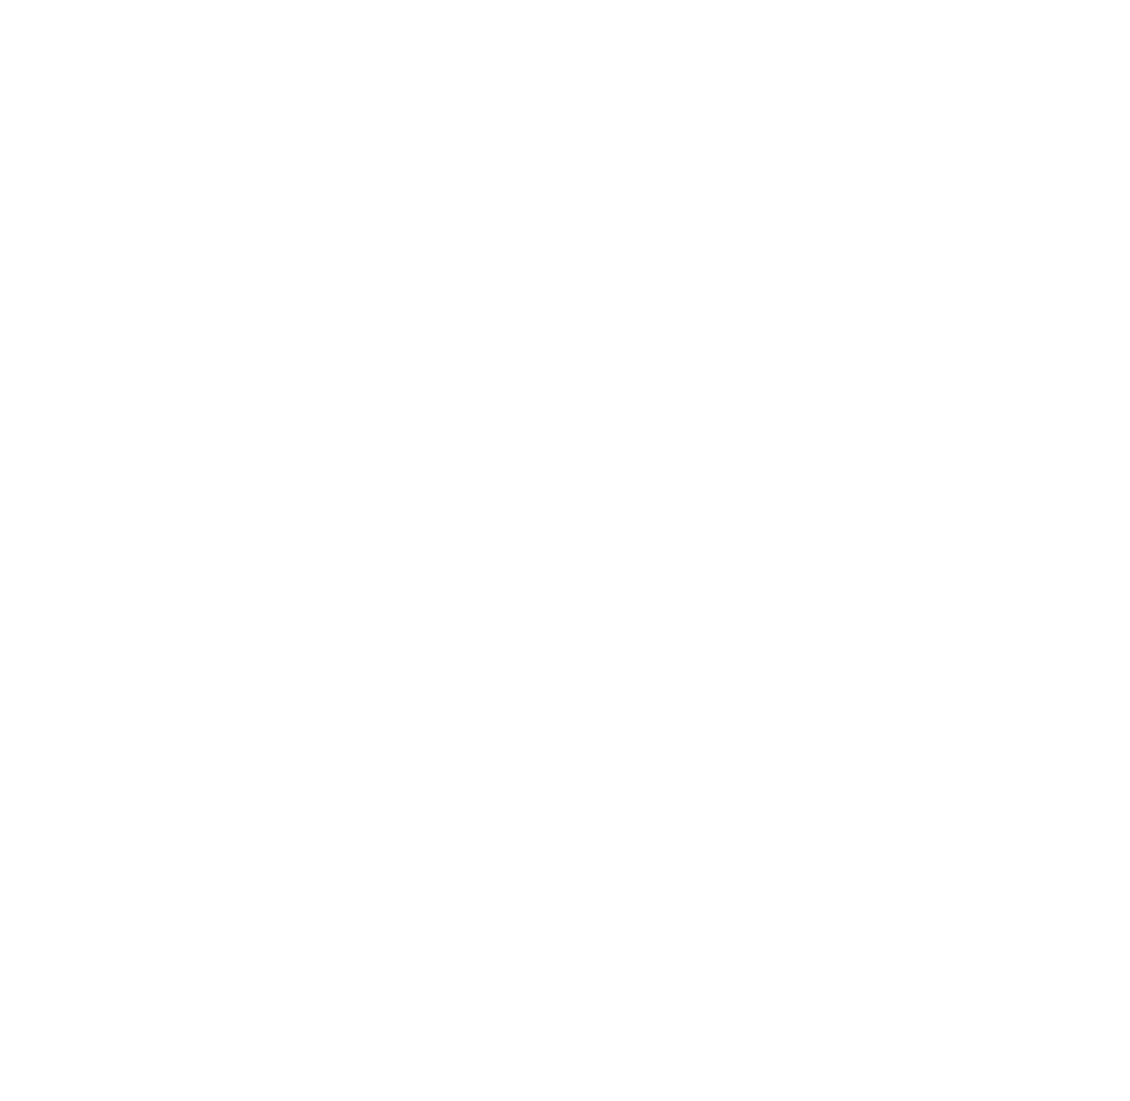

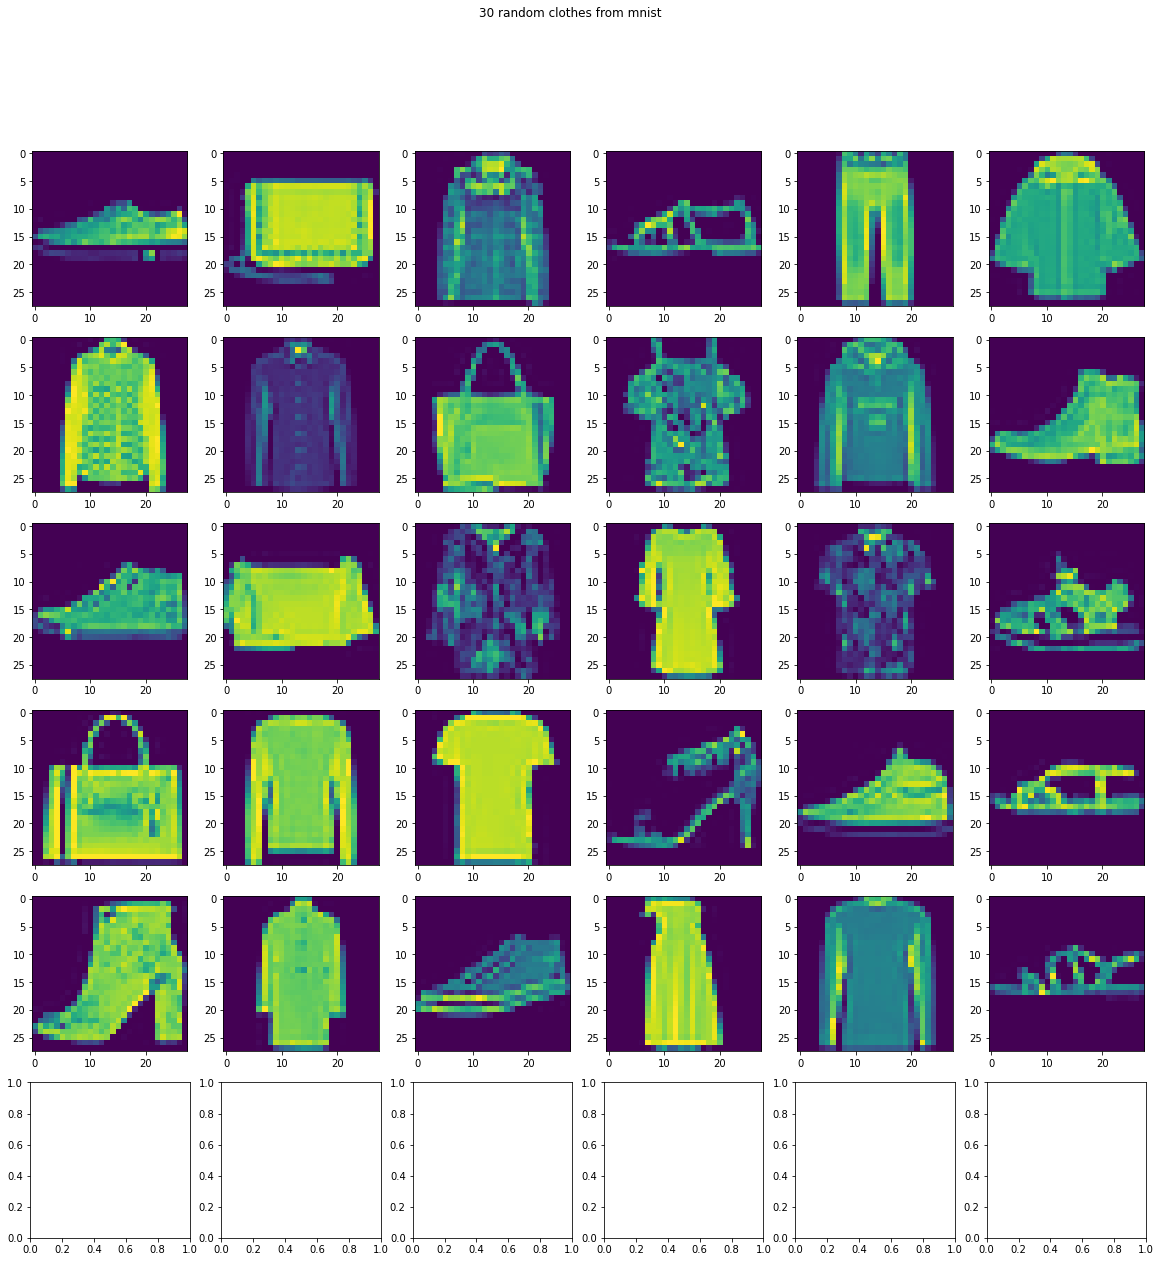

In [46]:
plt.grid(False)
plt.axis('off')
plt.rcParams['figure.figsize'] = (20,20)


dimplot = math.ceil(math.sqrt(N_IM))
fig, axs = plt.subplots(dimplot,dimplot)
fig.suptitle(f'{N_IM} random clothes from mnist')

iter_ = np.ndenumerate(axs)
for xid in range(sample.shape[0]):
  grid_idxs,ax = next(iter_)
  if xid > N_IM-1:
    break
  ax.imshow(sample[xid])

In [67]:
type(models['fashion_mnist'].layers) #list
prependCNNLayers = [
    tfl.Conv2D(
        64, 
        (3, 3),
        activation = 'relu',
        input_shape = (28, 28, 1)),
    tfl.MaxPool2D(2,2),
    tfl.Conv2D(
        64, 
        (3, 3),
        activation = 'relu'),
    tfl.MaxPool2D(2,2),
]


In [59]:
models['fashion_mnist'].summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           multiple                  0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [75]:
models['fmnist_CNN'] = keras.models.Sequential([
    tfl.Conv2D(
        64, 
        (3, 3),
        activation = 'relu',
        input_shape = (28, 28, 1)),
    tfl.MaxPool2D(2,2),
    tfl.Conv2D(
        64, 
        (3, 3),
        activation = 'relu'),
    tfl.MaxPool2D(2,2),
    tfl.Flatten(),
    tfl.Dense(
      128,
      tf.nn.relu),
    tfl.Dense(10, tf.nn.softmax)])

In [76]:
models['fmnist_CNN'].summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [138]:
predictions = models.get('fashion_mnist').predict(sample)
# the max val in the 10-long pred.-sub-array is the most likely object 
predictions = [labels[values.index(max(values))] \ 
               for values in predictions.tolist()]

1/1 [==============================] - 1s 1s/step


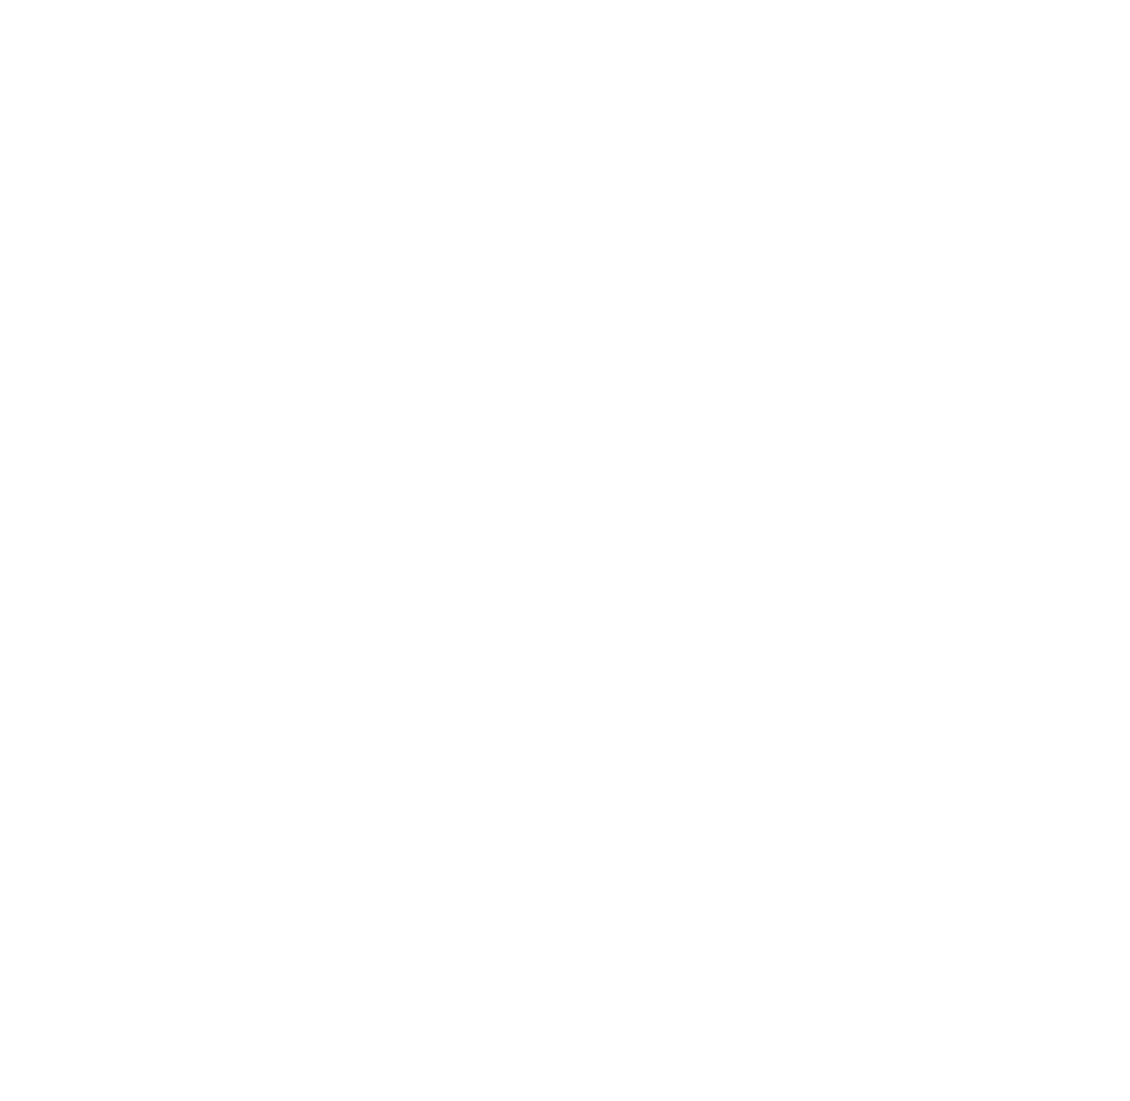

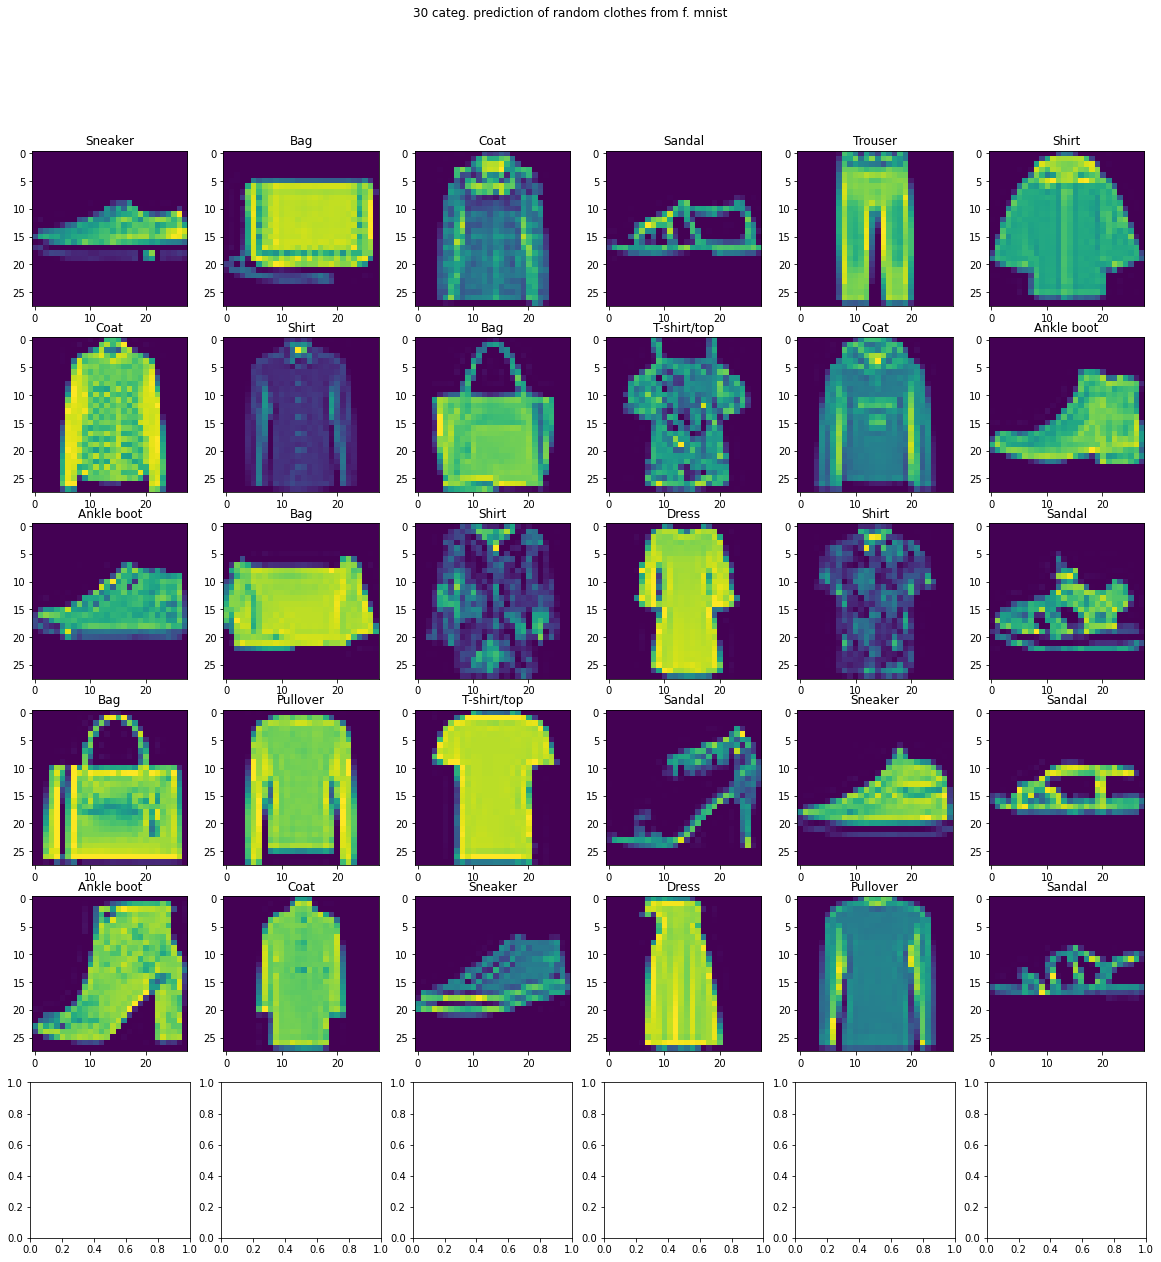

In [141]:
plt.grid(False)
plt.axis('off')
plt.rcParams['figure.figsize'] = (20,20) #fig-size, not related to nr of subplts


fig, axs = plt.subplots(dimplot,dimplot)
fig.suptitle(f'{N_IM} categ. prediction of random clothes from f. mnist')

iter_ = np.ndenumerate(axs) # subplots iterator
for xid in range(sample.shape[0]):# iterate over 1st(0) dim (= nr of images), other y & z dims describe the image itself (28 x 28)
  grid_idxs,ax = next(iter_)# ax identifies the subplot, xid ranges 0 - (nr of images - 1), grid_idxs is s 2-dim identifier in the plots grid, we don't need it
  if xid > N_IM-1:# break after all imgs in sample have b. plotted. The total number of subpots is >= than sample-length
    break
  ax.title.set_text(predictions[xid])
  ax.imshow(sample[xid])